# Perceptron
In this, perceptrons are used to train a Linear Model with previously labelled data and classify the new data by predicting the probability of new points.

In [1]:
# Import required modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Number of Points
n_pts = 100
# Centers of the two clusters of points
centers = [[-0.5, 0.5], [0.5, -0.5]]
# Generate points and labels, these are numpy arrays
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
# Convert these data points to Tensors
x_data = torch.Tensor(X)
# Convert and reshape the y into two dimensional tensor
y_data = torch.Tensor(y.reshape(100, 1))

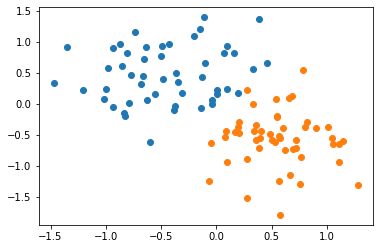

In [3]:
# Plot the data
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [4]:
# Define Linear Model Class
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    # Use Sigmoid function to convert output value into probability
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    # Predict the Class of output based on the probability
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [5]:
# Define Linear Model object with 2 input layers and 1 output layer
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [6]:
# Get Parameters
def get_params():
    (w, b) = model.parameters()
    w1, w2 = w.view(2)
    return (w1.item(), w2.item(), b[0].item())

In [7]:
# Define function to Plot the Linear Model and Input Data
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1) / (-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()

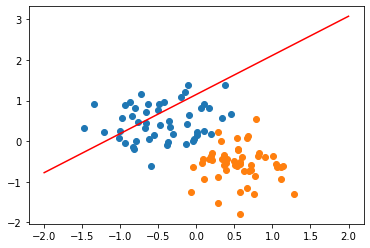

In [8]:
plot_fit('Initial Model')

In [9]:
# Define loss function using Binary Cross Entropy Loss method
criterion = nn.BCELoss()
# Define optimizer using Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
# Train the model for 1000 epochs
epochs = 1000
losses = []
for i in range(epochs):
    # Get Prediction of input data tensor
    y_pred = model.forward(x_data)
    # Calculate the loss using BCE
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss:', loss.item())
    losses.append(loss.item())
    # Initialize optimizer gradients to zero
    optimizer.zero_grad()
    # Calculate the partial derivatives of loss with respect to model parameters
    loss.backward()
    # Calculate new parameters for optimizer next step
    optimizer.step()

35327
epoch: 450 loss: 0.35996466875076294
epoch: 451 loss: 0.3596627712249756
epoch: 452 loss: 0.3593617379665375
epoch: 453 loss: 0.35906121134757996
epoch: 454 loss: 0.35876137018203735
epoch: 455 loss: 0.35846224427223206
epoch: 456 loss: 0.35816365480422974
epoch: 457 loss: 0.35786575078964233
epoch: 458 loss: 0.3575686514377594
epoch: 459 loss: 0.3572719693183899
epoch: 460 loss: 0.3569760024547577
epoch: 461 loss: 0.3566807210445404
epoch: 462 loss: 0.3563860356807709
epoch: 463 loss: 0.35609203577041626
epoch: 464 loss: 0.35579848289489746
epoch: 465 loss: 0.35550567507743835
epoch: 466 loss: 0.35521361231803894
epoch: 467 loss: 0.3549221456050873
epoch: 468 loss: 0.35463112592697144
epoch: 469 loss: 0.35434094071388245
epoch: 470 loss: 0.35405123233795166
epoch: 471 loss: 0.3537622392177582
epoch: 472 loss: 0.3534739017486572
epoch: 473 loss: 0.3531859517097473
epoch: 474 loss: 0.3528987765312195
epoch: 475 loss: 0.3526121973991394
epoch: 476 loss: 0.3523261547088623
epoch: 47

Text(0, 0.5, 'Loss')

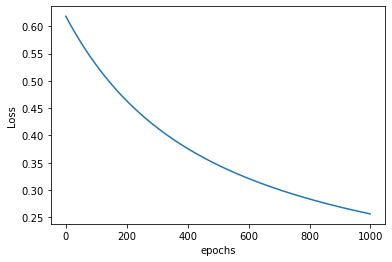

In [11]:
# Plot change in Loss for each iteration
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('Loss')

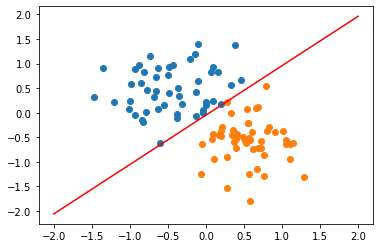

In [12]:
# Plot the Trained Model
plot_fit('Trained Model')

Red point probability = 0.9424158334732056
Black point probability = 0.05055497586727142
Red point is in class 1
Black point is in class 0


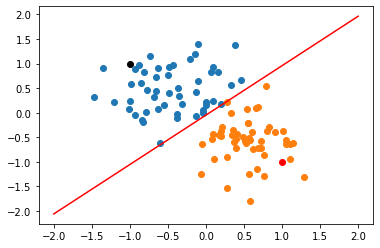

In [13]:
# Calculate Predicitons for two points and plot them
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1[0], point1[1], 'ro')
plt.plot(point2[0], point2[1], 'ko')
print('Red point probability = {}'.format(model.forward(point1).item()))
print('Black point probability = {}'.format(model.forward(point2).item()))
print('Red point is in class {}'.format(model.predict(point1)))
print('Black point is in class {}'.format(model.predict(point2)))
plot_fit('Trained Model')